In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors

pd.options.mode.chained_assignment = None # removes unnecessary error

In [53]:
training = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [54]:
''' Remove useless Features: '''

training = training.drop(['Ticket','PassengerId','Name','Fare'], axis=1) # 'cabin','Embarked'
test = test.drop(['Ticket','PassengerId','Name','Fare'], axis=1) # 'cabin','Embarked'


In [55]:
''' transform Features into numbers if necessary: '''

# mit one hit encoding bekommt man leichter 
training.loc[:,'Sex'][np.where(training['Sex'] == 'male')[0]] = 1   # male female into 1:male 0:female
training.loc[:,'Sex'][np.where(training['Sex'] == 'female')[0]] = 0 # male female into 1:male 0:female

givenCabins = np.where(training['Cabin'] == training['Cabin'])[0]   # find indexes where the cabin is given
training.loc[:,'Cabin'][givenCabins] = [cab[:1] for cab in training.loc[:,'Cabin'][givenCabins]] # The Number seems Irrelevant to me so I removed it
# The Cabin Number seems Irrelevant to me so I removed it. Then I replaced the deck letter with a Number and Nan with -1
training.loc[:,'Cabin'][givenCabins] = [ord(cab)-64 for cab in training.loc[:,'Cabin'][givenCabins]] 
training.loc[:,'Cabin'][np.where(training['Cabin'] != training['Cabin'])[0]] = -1 # set NaN Values to -100

# Embarked will be removed later so no need to make it numeric

In [56]:
print(training)

     Survived  Pclass Sex   Age  SibSp  Parch Cabin Embarked
0           0       3   1  22.0      1      0    -1        S
1           1       1   0  38.0      1      0     3        C
2           1       3   0  26.0      0      0    -1        S
3           1       1   0  35.0      1      0     3        S
4           0       3   1  35.0      0      0    -1        S
5           0       3   1   NaN      0      0    -1        Q
6           0       1   1  54.0      0      0     5        S
7           0       3   1   2.0      3      1    -1        S
8           1       3   0  27.0      0      2    -1        S
9           1       2   0  14.0      1      0    -1        C
10          1       3   0   4.0      1      1     7        S
11          1       1   0  58.0      0      0     3        S
12          0       3   1  20.0      0      0    -1        S
13          0       3   1  39.0      1      5    -1        S
14          0       3   0  14.0      0      0    -1        S
15          1       2   

<center><h1 style=font-size:50px> Let's visualize the features:  </h1> </center>

38.38 % survived
[549, 342]


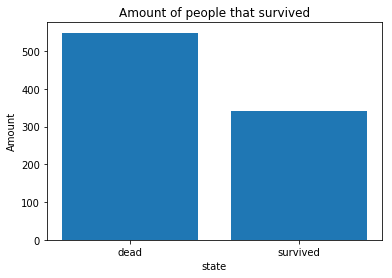

In [57]:
survivedOrDead = training.loc[:,'Survived'].dropna(axis=0, how='any')         # for safety, remove empty rows if existent
countSurvived = np.sum(survivedOrDead)
countDead = survivedOrDead.shape[0] - countSurvived
print(np.round(countSurvived/survivedOrDead.shape[0]*100,2),"% survived")
print([countDead,countSurvived])
plt.bar(["dead","survived"],[countDead,countSurvived], align='center')
plt.xticks([0,1])
plt.title("Amount of people that survived")
plt.xlabel("state")
plt.ylabel("Amount")
plt.show()

[216 184 491]


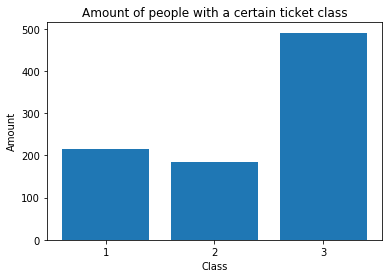

In [58]:
pclass = training.loc[:,'Pclass'].dropna(axis=0, how='any')         # for safety, remove empty rows if existent
countPclass = np.trim_zeros(np.bincount(pclass))                    # count people
print(countPclass)
plt.bar([1,2,3],countPclass, align='center')
plt.xticks([1,2,3])
plt.title("Amount of people with a certain ticket class")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.show()

314 577


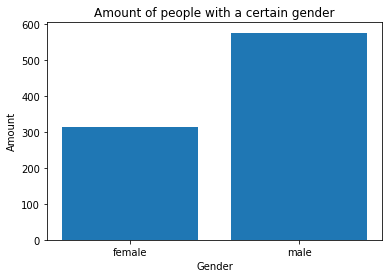

In [59]:
sex = training.loc[:,'Sex'].dropna(axis=0, how='any')         # for safety, remove empty rows if existent
male = np.sum(sex)
female = sex.shape[0] - male
print(female,male)
plt.bar(["female","male"],[female,male], align='center')
plt.xticks([0,1])
plt.title("Amount of people with a certain gender")
plt.xlabel("Gender")
plt.ylabel("Amount")
plt.show()

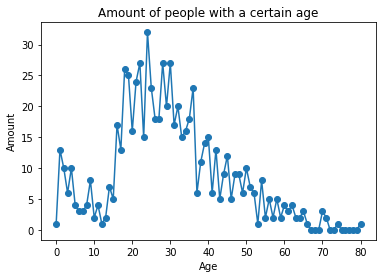

In [60]:
ages = training.loc[:,'Age'].dropna(axis=0, how='any')         # for ploting, remove empty age rows if existent
ages = np.round(ages.values,0).astype(np.int)                  # round age to integer
countAgeGroups = np.bincount(ages)                             # count people with age x
plt.plot(np.arange(countAgeGroups.shape[0]), countAgeGroups,'-o') # plot
plt.title("Amount of people with a certain age")
plt.xlabel("Age")
plt.ylabel("Amount")
plt.show()

[608 209  28  16  18   5   0   0   7]


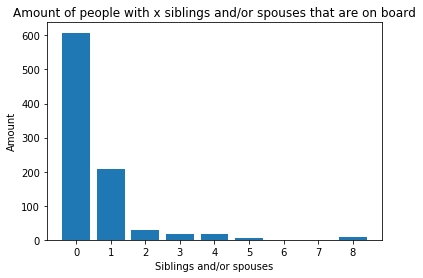

In [61]:
sibSp = training.loc[:,'SibSp'].dropna(axis=0, how='any')         # for ploting, remove empty age rows if existent
countSibSpGroups = np.bincount(sibSp)                             # count people
print(countSibSpGroups)
plt.bar(range(countSibSpGroups.shape[0]), countSibSpGroups, align='center') # plot
plt.xticks(range(countSibSpGroups.shape[0]))
plt.title("Amount of people with x siblings and/or spouses that are on board")
plt.xlabel("Siblings and/or spouses")
plt.ylabel("Amount")
plt.show()

[678 118  80   5   4   5   1]


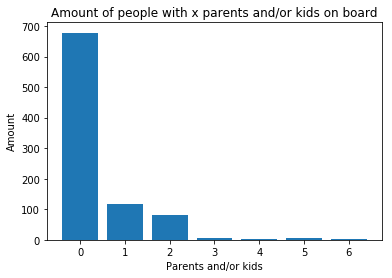

In [62]:
parch = training.loc[:,'Parch'].dropna(axis=0, how='any')         # for ploting, remove empty age rows if existent
countParchGroups = np.bincount(parch)                             # count people
print(countParchGroups)
plt.bar(range(countParchGroups.shape[0]), countParchGroups, align='center') # plot
plt.xticks(range(countParchGroups.shape[0]))
plt.title("Amount of people with x parents and/or kids on board")
plt.xlabel("Parents and/or kids")
plt.ylabel("Amount")
plt.show()

[('A', 0), ('B', 15), ('C', 47), ('D', 59), ('E', 33), ('F', 32), ('G', 13), ('H', 4), ('I', 0), ('J', 0), ('K', 0), ('L', 0), ('M', 0), ('N', 0), ('O', 0), ('P', 0), ('Q', 0), ('R', 0), ('S', 0), ('T', 0), ('U', 1)]


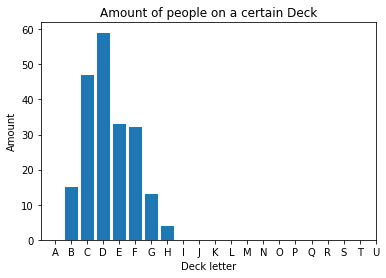

In [63]:
cabin = training.loc[:,'Cabin'].dropna(axis=0, how='any')         # for ploting, remove empty age rows if existent
cabin = np.array([cab for cab in cabin if cab != -1])             # remove unknown Cabins
countCabinGroups = np.bincount(cabin)                             # count people with cabin x
cabinLetters = [chr(num+65) for num in range(countCabinGroups.shape[0])]
print(list(zip(cabinLetters,countCabinGroups)))
plt.bar(cabinLetters, countCabinGroups, align='center')           # plot
plt.xticks(range(countCabinGroups.shape[0]))
plt.title("Amount of people on a certain Deck")
plt.xlabel("Deck letter")
plt.ylabel("Amount")
plt.show()

[168  77 644]


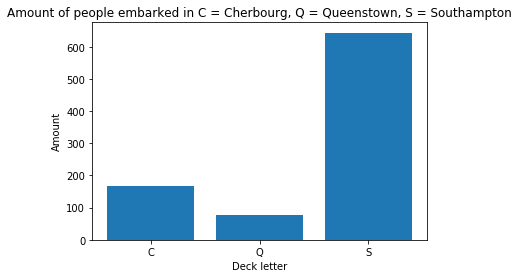

In [64]:
embarked = training.loc[:,'Embarked'].dropna(axis=0, how='any')       # for ploting, remove empty age rows if existent
embarkedNumbers = np.array([ord(char)-64 for char in embarked])
# print(embarkedNumbers[embarkedNumbers == 19].shape[0]) # check letter (e.g. 19)
# print(chr(19+64)) # check letter (e.g. 19)
countEmbarkedGroups = np.bincount(embarkedNumbers)                    # count people with cabin x
countEmbarkedGroups = countEmbarkedGroups[countEmbarkedGroups != 0]
print(countEmbarkedGroups)
plt.bar(["C","Q","S"], countEmbarkedGroups, align='center')           # plot
plt.xticks(range(countEmbarkedGroups.shape[0]))
plt.title("Amount of people embarked in C = Cherbourg, Q = Queenstown, S = Southampton")
plt.xlabel("Deck letter")
plt.ylabel("Amount")
plt.show()

<center><h1 style=font-size:50px> Age feature difficulties: </h1> </center>

In [65]:
''' Age feature difficulties: '''

print("Age is fractional at these positions:      ",np.where(training.loc[:,'Age'] < 1)[0])
print("Ecample value where the age is fractional: ",training.loc[:,'Age'].values[78])
print("Age is estimated at these positions:       ",np.where(np.modf(training.loc[:,'Age'].values)[0] == 0.5)[0])
print("Example age where it's estimated:          ",training.loc[:,'Age'].values[57])
print("Ignore these few Values for now.")

print("\nAge is unknown for these passengers:     \n",np.where(np.isnan(training.loc[:,'Age']))[0])
print("This is a lot. In fact in", np.round(100*np.sum(np.isnan(training.loc[:,'Age']))/training.shape[0],2),"% of the data the age is missing")

print("\nIt would be ideal if at first the Age could be learned and predicted by a model so that the missing information")
print("Can be filled up kind of properly. But this costs alot of effort so for now i will just delete these rows.")

Age is fractional at these positions:       [ 78 305 469 644 755 803 831]
Ecample value where the age is fractional:  0.83
Age is estimated at these positions:        [ 57 111 116 122 123 148 152 153 203 227 296 331 525 676 735 767 814 843]
Example age where it's estimated:           28.5
Ignore these few Values for now.

Age is unknown for these passengers:     
 [  5  17  19  26  28  29  31  32  36  42  45  46  47  48  55  64  65  76
  77  82  87  95 101 107 109 121 126 128 140 154 158 159 166 168 176 180
 181 185 186 196 198 201 214 223 229 235 240 241 250 256 260 264 270 274
 277 284 295 298 300 301 303 304 306 324 330 334 335 347 351 354 358 359
 364 367 368 375 384 388 409 410 411 413 415 420 425 428 431 444 451 454
 457 459 464 466 468 470 475 481 485 490 495 497 502 507 511 517 522 524
 527 531 533 538 547 552 557 560 563 564 568 573 578 584 589 593 596 598
 601 602 611 612 613 629 633 639 643 648 650 653 656 667 669 674 680 692
 697 709 711 718 727 732 738 739 740 760 766 768 

In [66]:
''' Optional: Fill unknown ages with mean age of all passengers''' 
# not the best idea because it smoothens the impact of the age feature and can even lead to wrong results

#allAges = training.loc[:,'Age'][~np.isnan(training.loc[:,'Age'])] # remove NaN from allAges
#meanAge = np.round(np.sum(allAges)/allAges.shape[0],0)
#training.loc[:,'Age'][np.isnan(training.loc[:,'Age'])] = meanAge


''' Remove rows that still contain NaN: '''

shapeBefore = training.shape[0]
training = training.dropna(axis=0, how='any') # remove empty rows
print("Removed", shapeBefore - training.shape[0], "rows because at least one feature was None")

Removed 179 rows because at least one feature was None


<center><h1 style=font-size:40px> Let's visualize the features effects on the survival:</h1></center>
<h3>This is also a important part of feature engineering. We want to find the features with the biggest impact on the survival and maybe even make new features up from combinations of them.</h3>

In [67]:
# survived in the class / total people in the class
# class could be anything, a specific age for example
survivedOrDead = training.loc[:,'Survived']                         # needed for all following plots

[ 65.22  47.98  23.94]


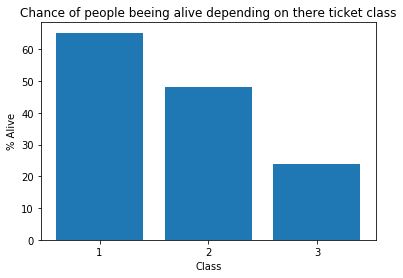

In [68]:
pclass = training.loc[:,'Pclass']                                   # get ticket class
countPclass = np.trim_zeros(np.bincount(pclass))                    # count people in class
classes = np.nonzero(countPclass)[0] + 1
countAlivePclass = [np.sum(survivedOrDead.values[np.where(pclass == _class)[0]]) for _class in classes]
alivePercentPclass = np.divide(countAlivePclass, countPclass) * 100 # get percentage of people alive for each class
print(np.round(alivePercentPclass,2))

plt.bar([1,2,3],alivePercentPclass, align='center')
plt.xticks([1,2,3])
plt.title("Chance of people beeing alive depending on there ticket class")
plt.xlabel("Class")
plt.ylabel("% Alive")
plt.show()

[ 75.29  20.53]


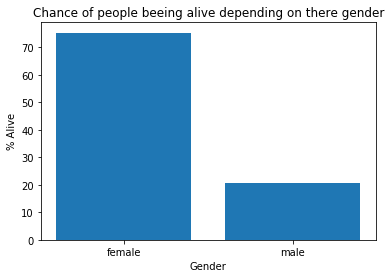

In [69]:
sex = training.loc[:,'Sex']                                         # get the data
male = np.sum(sex)                                                  # count people in class
female = sex.shape[0] - male
classes = [0,1]
countAliveSex = [np.sum(survivedOrDead.values[np.where(sex == _class)[0]]) for _class in classes]
alivePercentSex = np.divide(countAliveSex, [female,male]) * 100
print(np.round(alivePercentSex,2))

plt.bar(["female","male"],alivePercentSex, align='center')
plt.xticks([0,1])
plt.title("Chance of people beeing alive depending on there gender")
plt.xlabel("Gender")
plt.ylabel("% Alive")
plt.show()

[ 100.     84.62   30.     83.33   70.    100.     66.67   33.33   50.
   25.      0.     25.    100.    100.     42.86   80.     35.29   46.15
   34.62   36.     18.75   20.83   40.74   33.33   46.88   26.09   33.33
   61.11   25.93   40.     37.04   47.06   50.     40.     37.5    61.11
   47.83   16.67   40.     35.71   40.     33.33   46.15   20.     33.33
   41.67    0.     11.11   66.67   66.67   50.     28.57   50.    100.
   37.5    50.     40.      0.     60.      0.     50.      0.     33.33
  100.      0.      0.      0.      0.      0.      0.      0.      0.
    0.      0.      0.      0.      0.      0.      0.      0.    100.  ]
This looks like you can't tell if a person will survive depending on the age. The distribution looks pretty much random.
To visualize this I've plotted the knn curve with 5 neighbors. This shows a little higher chance of surviving for young people and older people


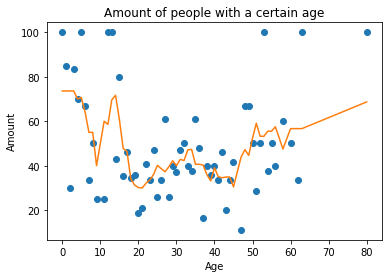

In [70]:
ages = training.loc[:,'Age']                                         # get the data
ages = np.round(ages.values,0).astype(np.int)                        # round age to integer
countAgeGroups = np.bincount(ages)                                   # count people with age x
classes = np.arange(countAgeGroups.shape[0])
countAliveAge = [np.sum(survivedOrDead.values[np.where(ages == _class)[0]]) for _class in classes]

# survived / total (in age group). If total = 0 set result to 0
alivePercentAge = [np.divide(countAliveAge[i], group) * 100 if group != 0 else 0 for i,group in enumerate(countAgeGroups)]
print(np.round(alivePercentAge,2))
alivePercentAge = np.array(alivePercentAge)                          # back to Numpy Array

classes = np.nonzero(alivePercentAge)[0]                             # remove age groups with 0 persons in it
alivePercentAge = alivePercentAge[np.nonzero(alivePercentAge)[0]]    # remove age groups with 0 persons in it

# knn plot to see trends:
classes_knnFormat = np.array(classes).reshape(len(classes),1)
yKNN = neighbors.KNeighborsRegressor(5).fit(classes_knnFormat, alivePercentAge).predict(classes_knnFormat)

plt.plot(classes, alivePercentAge,'o') # plot
plt.plot(classes, yKNN)
plt.title("Amount of people with a certain age")
plt.xlabel("Age")
plt.ylabel("Amount")
print("This looks like you can't tell if a person will survive depending on the age. The distribution looks pretty much random.")
print("To visualize this I've plotted the knn curve with 5 neighbors. This shows a little higher chance of surviving for young people and older people")
plt.show()

In [71]:
# add feature "isKid" with persons < 13 years of age